# Resumo do Trabalho

Neste trabalho será feita uma analise da variavel de classificação  sobre um dataset publico disponibilizado no kaggle, sobre status de pokémon, as hipoteses tem a haver com o tipo do pokémon, descobrir se é possivel predizer o tipo do pokemon com base nos seus status, e sobre ser lerdario, no caso se  é possivel classificar um pokemon sé é lendario ou não atraves das somas de status

O link<br>
https://www.kaggle.com/datasets/abcsds/pokemon/data

Licença:CC0: Public Domain<br>https://creativecommons.org/publicdomain/zero/1.0/

#Bibliotecas usadas as bibliotecas usadas estarão listadas abaixo e poderão ser baixadas via requeriment.txt, que estará no github do projeto

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,accuracy_score, classification_report,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [196]:
!pip freeze > requirements.txt

In [ ]:
pip install -r requirements.txt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [243]:
df = pd.read_csv("/content/Pokemon.csv")

#EDA

In [244]:
df.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Esses valores nulos são os pokemon com 1 só tipo, não acho interessante preencher porque pode acarretar em resultantes erroneos

Retirando os pokemon mega, pois eu quero trabalhar unicamente com os pokemon base, sem mecanicas

In [245]:
df = df[~df['Name'].str.contains('Mega ')]

In [246]:
type_colors = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

pokemon_types = df['Type 1'].unique()
pokemon_colors = dict(zip(pokemon_types, type_colors))

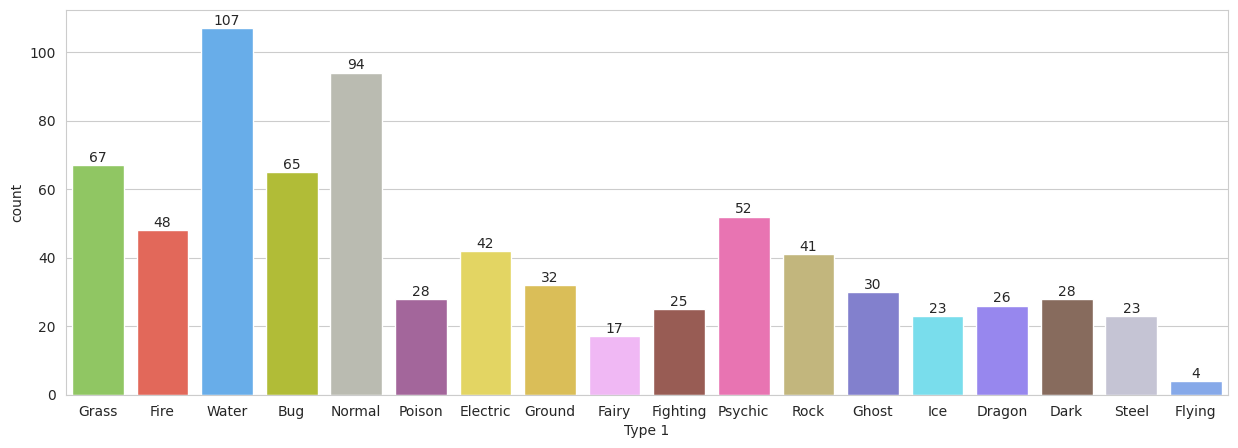

In [247]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 1',palette=pokemon_colors,hue="Type 1",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


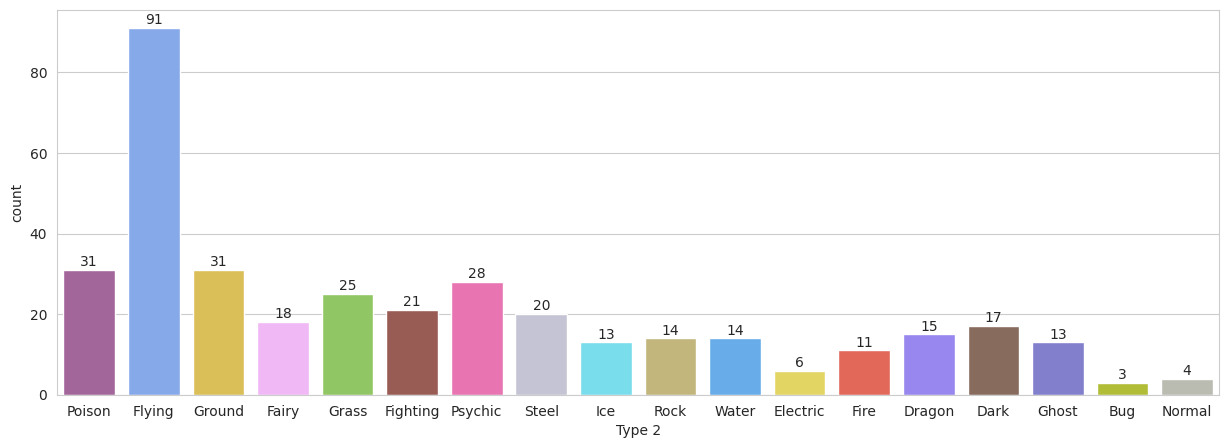

In [248]:

plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 2',palette=pokemon_colors,hue="Type 2",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


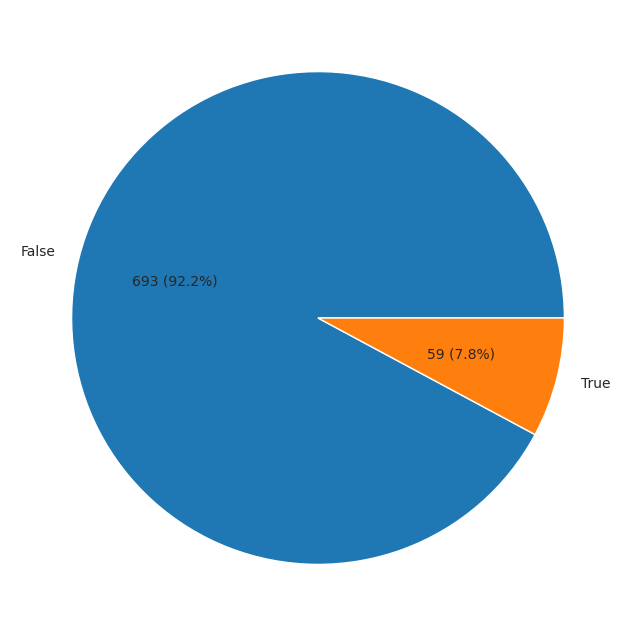

In [212]:
vc = df['Legendary'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    vc,
    labels=vc.index,
    autopct=lambda p: f'{p*vc.sum()/100:.0f} ({p:.1f}%)'
)
plt.show()


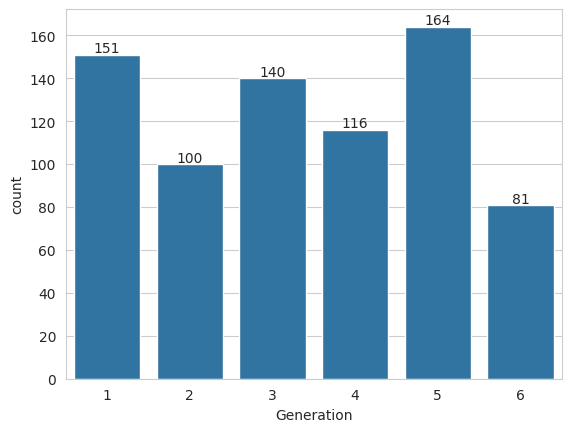

In [214]:
ax=sns.countplot(df,x='Generation')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

In [215]:
bins = [0,50,100, 150, 200, 250, 300]
labels = ['0-50','51-99','100–150', '151–200', '201–250', '251–300']

df['HP_range'] = pd.cut(df['HP'], bins=bins, labels=labels, include_lowest=True)


In [216]:
hp_counts = df['HP_range'].value_counts().sort_index()
print(hp_counts)

HP_range
0-50       208
51-99      483
100–150     55
151–200      4
201–250      1
251–300      1
Name: count, dtype: int64


In [217]:
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df['Attack_range'] = pd.cut(df['Attack'], bins=bins, labels=labels, include_lowest=True)


In [218]:
Attack_counts = df['Attack_range'].value_counts().sort_index()
print(Attack_counts)

Attack_range
0-50       169
51-99      448
100–150    128
151–200      7
Name: count, dtype: int64


In [219]:
bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df['Defense_range'] = pd.cut(df['Defense'], bins=bins, labels=labels, include_lowest=True)


In [220]:
Defense_counts = df['Defense_range'].value_counts().sort_index()
print(Defense_counts)

Defense_range
0-50       211
51-99      441
100–150     90
151–200      9
201–250      1
Name: count, dtype: int64


In [221]:
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df['Sp.Atk_range'] = pd.cut(df['Sp. Atk'], bins=bins, labels=labels, include_lowest=True)


In [222]:
SpAtk_counts = df['Sp.Atk_range'].value_counts().sort_index()
print(SpAtk_counts)

Sp.Atk_range
0-50       237
51-99      400
100–150    110
151–200      5
Name: count, dtype: int64


In [223]:
bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df['Sp.Def_range'] = pd.cut(df['Sp. Def'], bins=bins, labels=labels, include_lowest=True)


In [224]:
SpDef_counts = df['Sp.Def_range'].value_counts().sort_index()
print(SpDef_counts)

Sp.Def_range
0-50       210
51-99      458
100–150     77
151–200      6
201–250      1
Name: count, dtype: int64


In [225]:
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df['Speed_range'] = pd.cut(df['Speed'], bins=bins, labels=labels, include_lowest=True)


In [226]:
Speed_counts = df['Speed_range'].value_counts().sort_index()
print(Speed_counts)

Speed_range
0-50       254
51-99      414
100–150     82
151–200      2
Name: count, dtype: int64


In [227]:
bins = [150, 200,250,300,350,400,450,500,550,600,650,700,750,800]
labels = ['151–200','201-250','251-300','301-350','351-400','401-450','451-500','501-550','551-600','601-650','651-700','701-750','751-800']

df['Total_range'] = pd.cut(df['Total'], bins=bins, labels=labels, include_lowest=True)


In [228]:
Total_counts = df['Total_range'].value_counts().sort_index()
print(Total_counts)

Total_range
151–200     10
201-250     33
251-300     78
301-350    126
351-400     60
401-450     97
451-500    169
501-550    100
551-600     56
601-650      0
651-700     20
701-750      1
751-800      2
Name: count, dtype: int64


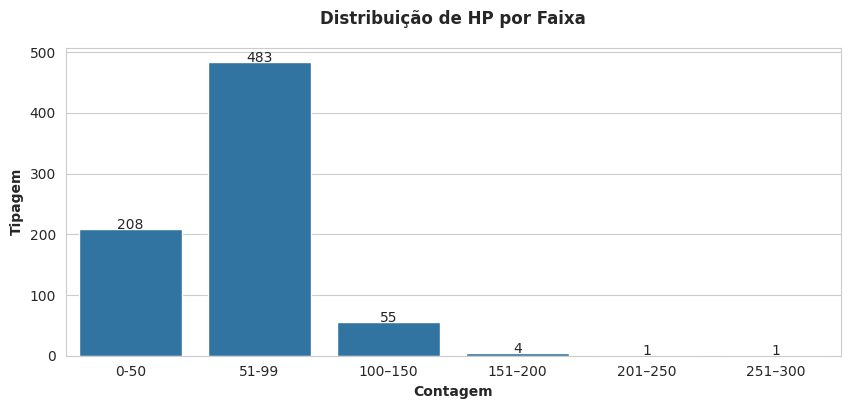

In [229]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=hp_counts.index, y=hp_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de HP por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

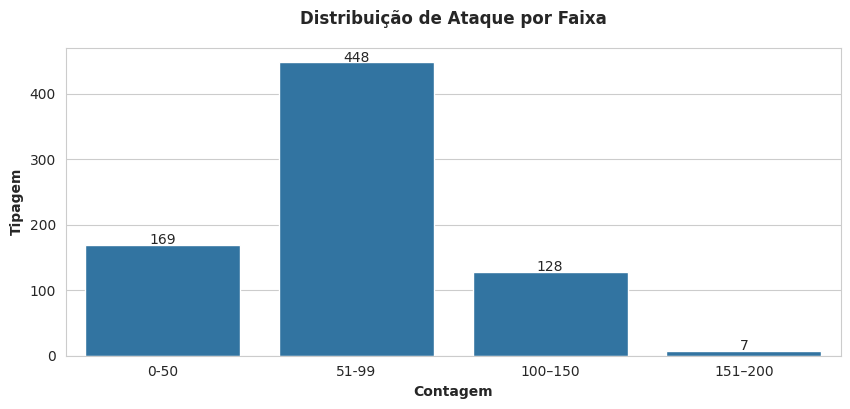

In [231]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=Attack_counts.index, y=Attack_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

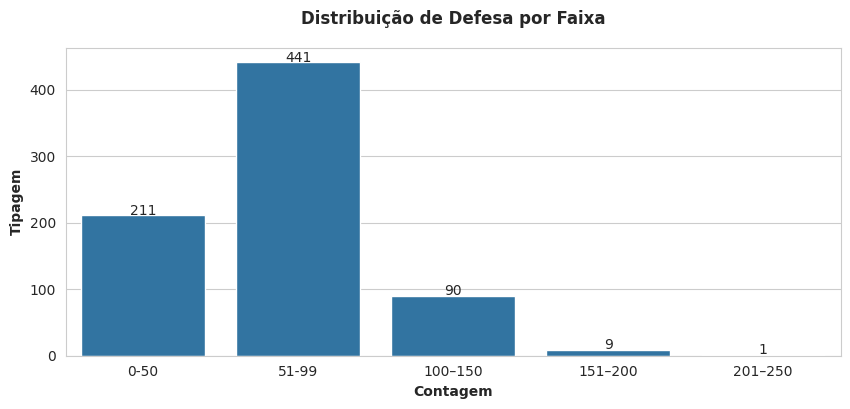

In [232]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=Defense_counts.index, y=Defense_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

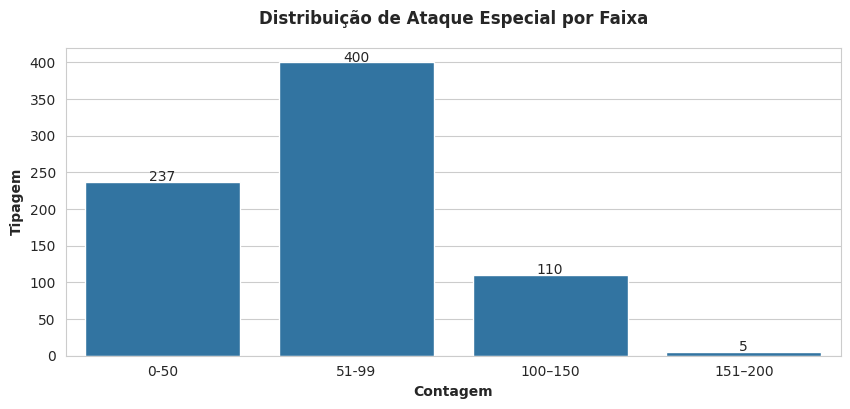

In [233]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpAtk_counts.index, y=SpAtk_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

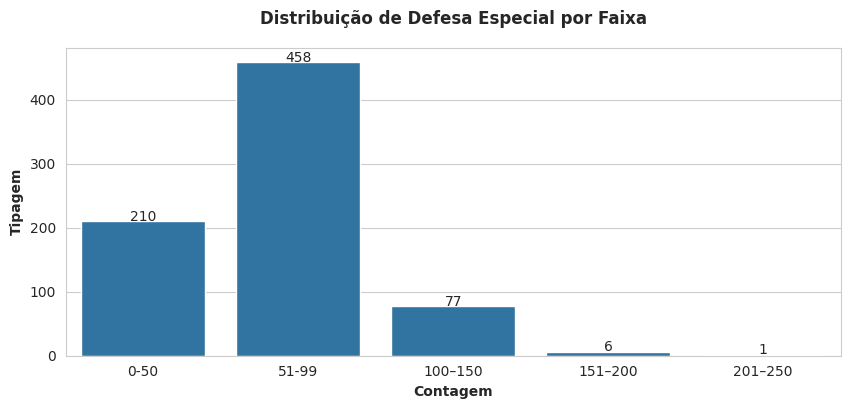

In [234]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpDef_counts.index, y=SpDef_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

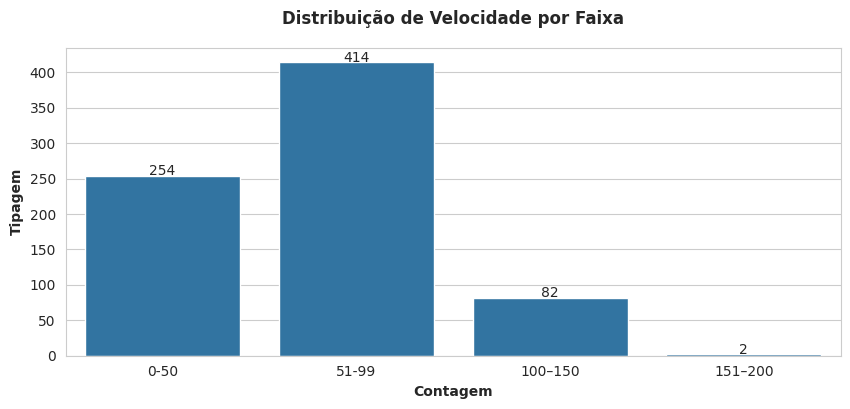

In [235]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=Speed_counts.index, y=Speed_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Velocidade por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

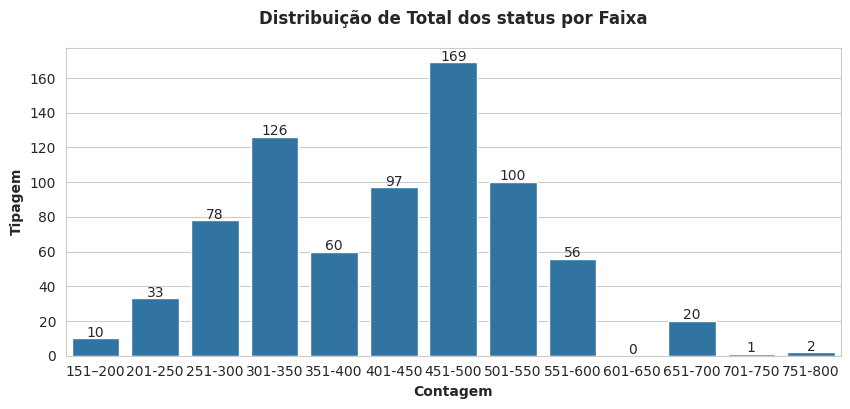

In [236]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=Total_counts.index, y=Total_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Total dos status por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


--- T-Test (Legendary vs não-Legendary Total) ---
T-statistic: 28.4097, P-value: 4.2678e-49
Média Legendary Total: 626.95
Média Não-Legendary Total: 406.13



Text(0.5, 1.0, 'Distribuição de Status Total: Lendários vs Não-Lendários')

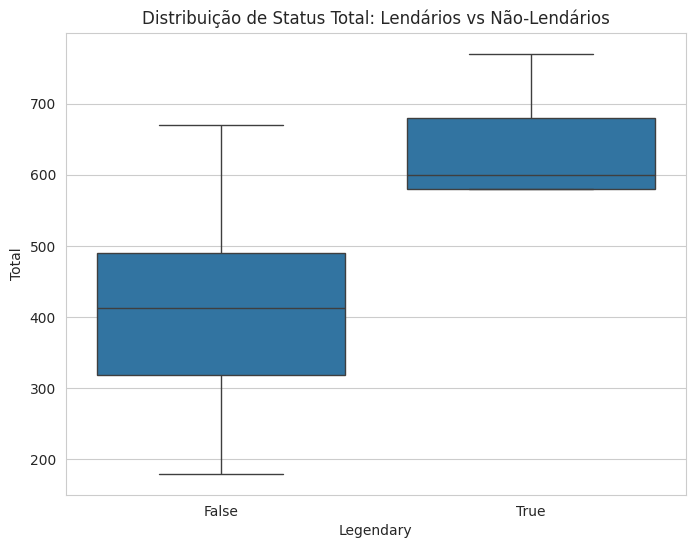

In [240]:
legendary = df[df['Legendary'] == True]['Total']
non_legendary = df[df['Legendary'] == False]['Total']

# Perform T-test
t_stat, p_val_ttest = stats.ttest_ind(legendary, non_legendary, equal_var=False) # Welch's t-test


print(f"\n--- T-Test (Legendary vs não-Legendary Total) ---")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val_ttest:.4e}")
print(f"Média Legendary Total: {legendary.mean():.2f}")
print(f"Média Não-Legendary Total: {non_legendary.mean():.2f}\n")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Legendary', y='Total', data=df)
plt.title('Distribuição de Status Total: Lendários vs Não-Lendários')

**Analise**<br>
Vendo a analise do T-test, o qual analisou as medias dos status dos lendarios e nçao lendarios, vendo o valor de p=9.3580e-47, é notrorio perceber que Lendarios tendem a ter status mais elevados que pokemon normais.

Insight<br>
Com a media dos status dos lendarios sedno mais de 200 acima dos pokemon normal, por isso que quanto torneios competições que deixar a utilização de lenddarios muitos, se não todos, os competidores utilizam um em seu time ,pois matematicamente um pokemon que é tem status tão elevados te deixa com uma chance de vitoria mais alta do que nãoo usar. Essa  desporoporção também é a causa dos lendarios serem banidos ou serem limitados a apaenas 1 por time nos campeonatos.


--- ANOVA (Type 1 vs Attack) ---
F-statistic: 6.0041, P-value: 3.8892e-13



Text(0.5, 1.0, 'Distribuição de Ataque por Tipo Primário')

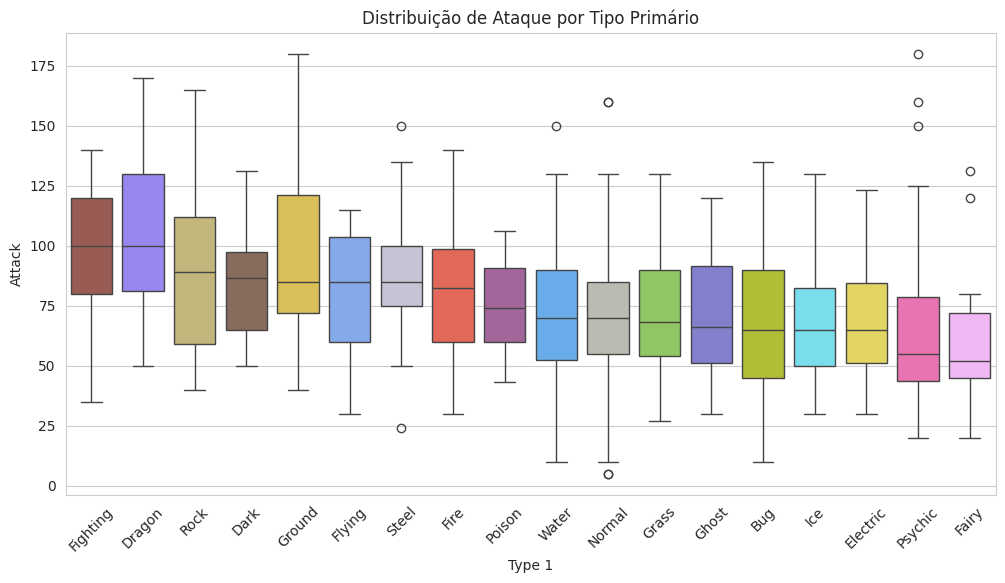

In [241]:
types = df['Type 1'].unique()
type_groups = [df[df['Type 1'] == t]['Attack'] for t in types]

f_stat, p_val_anova = stats.f_oneway(*type_groups)


print(f"\n--- ANOVA (Type 1 vs Attack) ---")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val_anova:.4e}\n")
order = df.groupby('Type 1')['Attack'].median().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type 1', y='Attack', data=df, order=order,palette = pokemon_colors,hue="Type 1")
plt.xticks(rotation=45)
plt.title('Distribuição de Ataque por Tipo Primário')

**Analise** <br>
É possivel perceber que certos tipos de pokémon tem suas medianas mais altas, ou seja tendem a ser mais fortes do lado fisico do que do lado especial do que outro,s um exemplo disso é o tipo lutador ou pedra e o o tipo eletrico e psicquico, onde no qual os 2 primeiros tem a mediana do status de ataque fisico  que os 2 ultimo, ou sejam se enfretam um  tipo pedra ou lutador tendem a enfretar um pokemon que ira usar ataques do tipo fisico enquanto se for do tipo psiquico ou fada eles vão tender mais para o lado especial

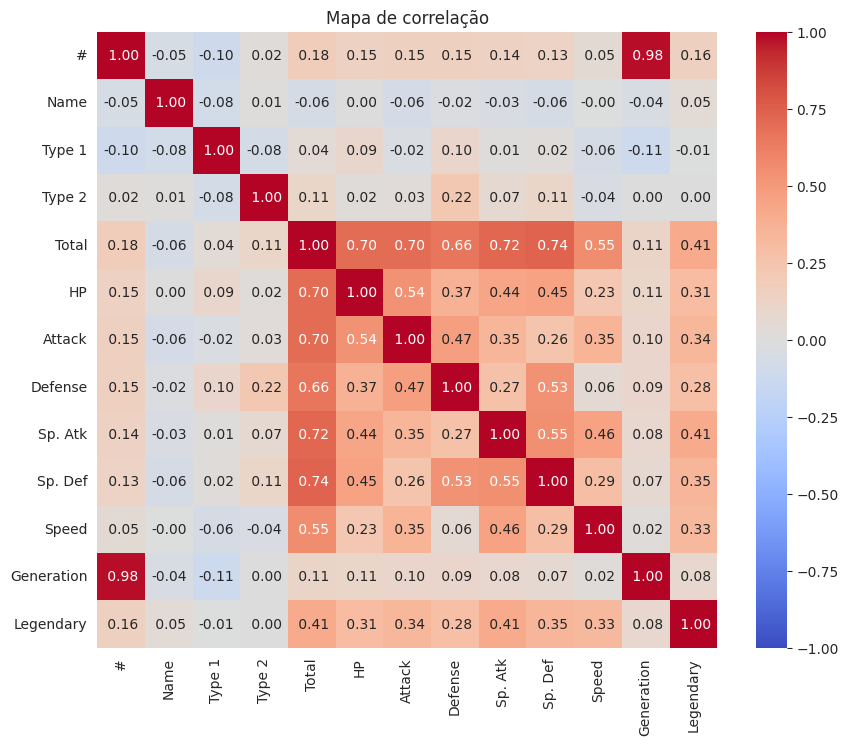

In [249]:
df_num = df.copy()

for col in df_num.columns:
    df_num[col] = df_num[col].astype("category").cat.codes

correlacao = df_num.corr()
plt.figure(figsize=(10,8))
plt.title("Mapa de correlação")
sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True,cmap="coolwarm",fmt=" .2f")
plt.show()

Text(0.5, 1.0, 'Mapa de Correlação dos Status')

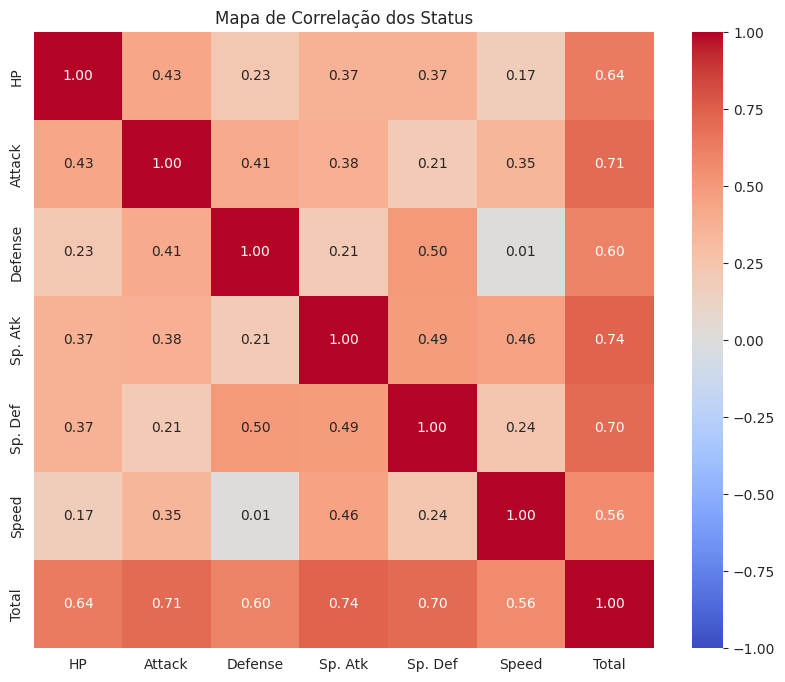

In [250]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')

Trade-offs de Status

É possivel notar algumas coisas nesse mapa de correlações  açgumas caracterisitcas, como por exemplo velocidade e e defesa não combinam, ou seja  um pokemon rápido tende a ser frafil na defesa fisica, pokemon tanques tender a ter as duas defesas, fisica e especial altas e um pokemon forte no Ataque especial tende a ter uma defesa especial alta também

Insight

Ou seja, se tiver que enfrentam um pokemon forte na defesa fisica assuma que ele tenha uma defesa especial media para alta também,sendo bem dificil derrota-lo sem lear em conta fraqueza ou condições negativas, por outro lado se tiver um pokemon rápido a  tendencia é ele ser fragil, ou seja se você suporta ao ataque dele, que na maioria dos casos é alta visto que a corelação de speed tanto com ataque fisico quanto especial são altas, voce pode derrota-lo com um golpe, principalmente se for super efetivo

#Hipoteses

## Hipótese 1

 Podemos determinar o tipo de um pokemon somente obsetvando os seus status?

### Dados relevantes para a Hipotese

Text(0.5, 1.0, 'Média dos Status por Tipo Principal')

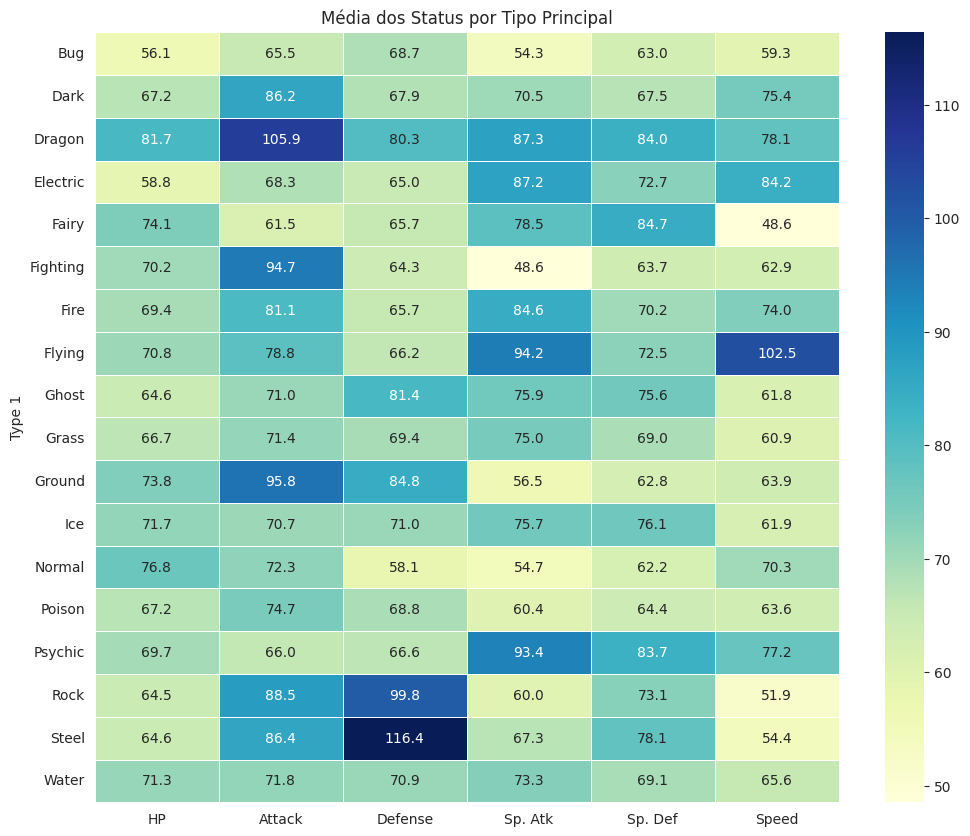

In [251]:
# Lista dos status
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# agrupa para os 2 tipos
type_stats = df.groupby('Type 1')[stats_cols].mean()

# 1. Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(type_stats, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Média dos Status por Tipo Principal')



In [252]:
#move-se pelas colunas, le todas as colunas de cada linha
resultado_tipos = type_stats.agg(['idxmax', 'max'], axis=1)
#move-se pelas linhas le todas aslinhas de cada coluna
resultado_tipos_2 = type_stats.agg(['idxmax', 'max'], axis=0).T #Transpor, transforma linha em coluna e vice e versa


print("Status mais forte por Tipo:")
print(resultado_tipos)
print("\nTipo mais forte por Status:")
print("\n",resultado_tipos_2)

Status mais forte por Tipo:
           idxmax         max
Type 1                       
Bug       Defense   68.692308
Dark       Attack       86.25
Dragon     Attack  105.884615
Electric  Sp. Atk   87.166667
Fairy     Sp. Def   84.705882
Fighting   Attack       94.72
Fire      Sp. Atk   84.645833
Flying      Speed       102.5
Ghost     Defense   81.433333
Grass     Sp. Atk   75.014925
Ground     Attack       95.75
Ice       Sp. Def   76.130435
Normal         HP   76.776596
Poison     Attack   74.678571
Psychic   Sp. Atk   93.384615
Rock      Defense   99.756098
Steel     Defense  116.391304
Water     Sp. Atk   73.261682

Tipo mais forte por Status:

          idxmax         max
HP       Dragon   81.653846
Attack   Dragon  105.884615
Defense   Steel  116.391304
Sp. Atk  Flying       94.25
Sp. Def   Fairy   84.705882
Speed    Flying       102.5


### Fazendo a previsão

### Tentativa 1: usando primeiro o ramdom forest

In [253]:
#Criando as sfeatures
df_pred = df.copy()
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df_pred[features]
y = df_pred['Type 1']

#treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prever
y_pred = clf.predict(X_test)

# Avaliar
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Acurácia : {accuracy_rf:.2%}")

# Mostrar o relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia : 22.57%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bug       0.43      0.25      0.32        24
        Dark       0.00      0.00      0.00         8
      Dragon       0.11      0.17      0.13         6
    Electric       0.30      0.30      0.30        10
       Fairy       0.00      0.00      0.00         4
    Fighting       0.00      0.00      0.00         9
        Fire       0.50      0.29      0.37        17
      Flying       0.00      0.00      0.00         1
       Ghost       0.40      0.36      0.38        11
       Grass       0.00      0.00      0.00        12
      Ground       0.00      0.00      0.00        10
         Ice       0.00      0.00      0.00         7
      Normal       0.36      0.52      0.42        29
      Poison       0.00      0.00      0.00         9
     Psychic       0.47      0.44      0.45        16
        Rock       0.11      0.20      0.14        10
       Steel       0.00      0.00 

Text(0, 0.5, 'Status')

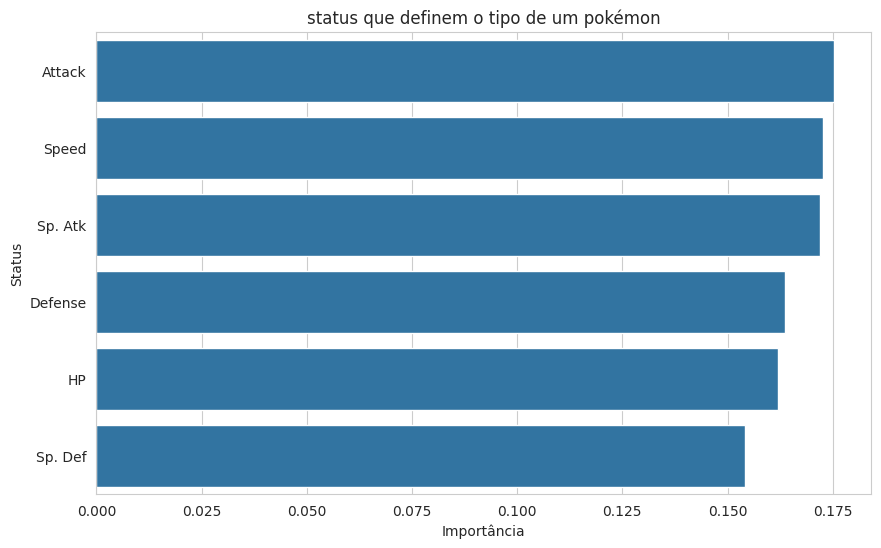

In [254]:
#vizualização em um grafico de quuais são os status que mais fazem a tender em um tipo
feature_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("status que definem o tipo de um pokémon")
plt.xlabel("Importância")
plt.ylabel("Status")

**Resultado =** Melhorou chegando a quase 25% de acerto entretanto ainda tem como melhorar o random forest,e será mostrado a seguir, sendo a principal arma a junção de status

## Melhorando o Codigo

### Tentativa 2:usando Gradient Boosting, junção de variaveis fracas

Text(0.5, 1.0, 'Mapa de Correlação dos Status')

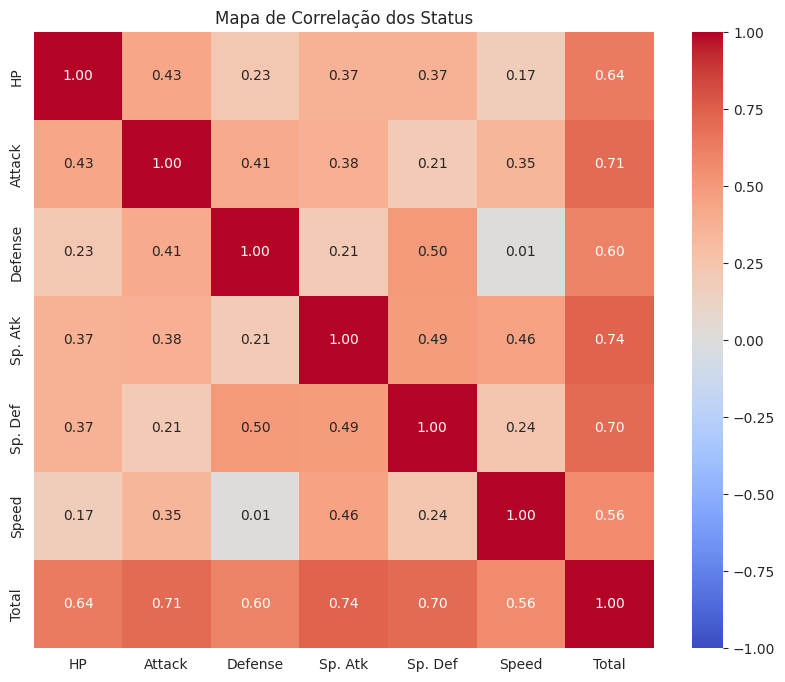

In [255]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')

Revendo esse heat map porém agora focado e ver quais são possiveis variavei interresantes a serem juntadas

In [258]:
# Converter Legendary para número (0 ou 1)
df_dupla_pred = df.copy()
df_dupla_pred['Is_Legendary'] = df_dupla_pred['Legendary'].map(int)

# Diferença entre Ataque Físico e Especial (Define se é atacante fisico ou especial)
df_dupla_pred['Phys_vs_Spec'] = df_dupla_pred['Attack'] - df_dupla_pred['Sp. Atk']

# Diferença entre Defesa Física e Especial (Define se é Tanque Físico ou Tanque Especial)
df_dupla_pred['Def_vs_SpDef'] = df_dupla_pred['Defense'] - df_dupla_pred['Sp. Def']

# Proporção de Velocidade (O quão rápido ele é em relação ao total de força)
df_dupla_pred['Speed_Share'] = df_dupla_pred['Speed'] / df_dupla_pred['Total']

# Selecionar as colunas novas + antigas
features_enhanced = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
                     'Total', 'Generation', 'Is_Legendary', 'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share']

X = df_dupla_pred[features_enhanced]
y = df_dupla_pred['Type 1']

# 4. Treinar Modelo (Gradient Boosting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)

print(f"Acurácia com Novas Features e Gradient Boosting: {accuracy_gb:.2%}")

Acurácia com Novas Features e Gradient Boosting: 23.45%


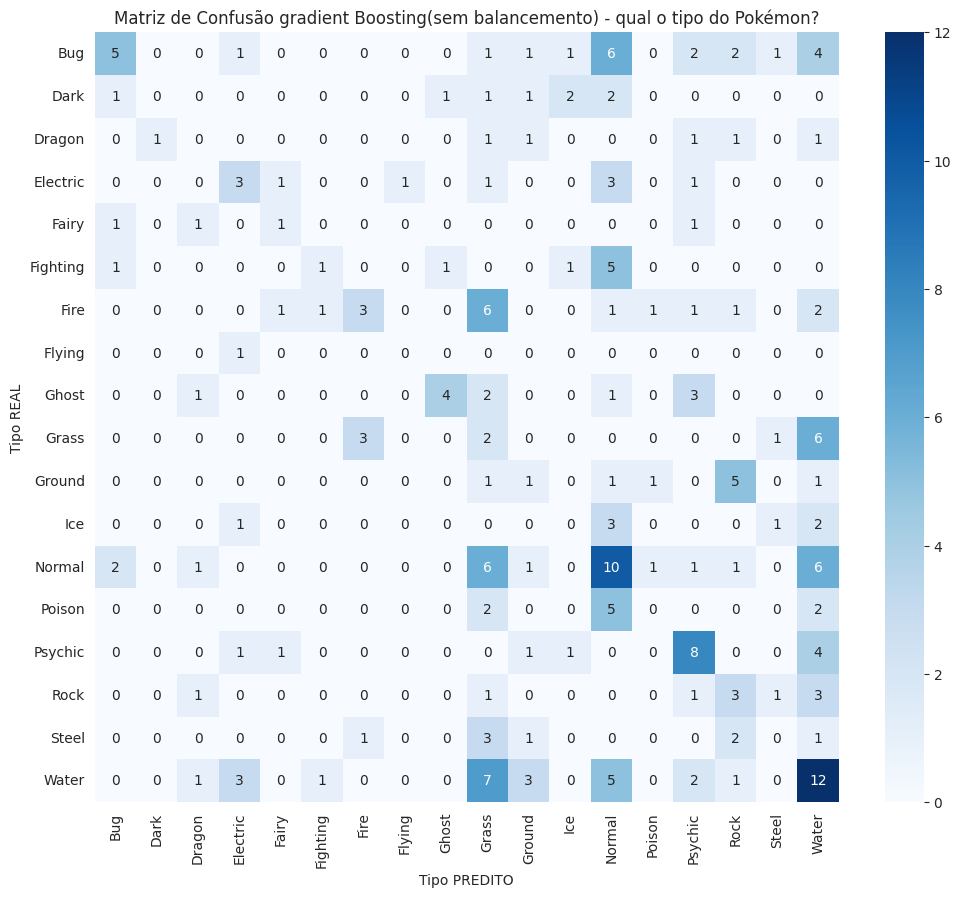

In [259]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.title('Matriz de Confusão gradient Boosting(sem balancemento) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()


O que mais ajudou o modelo agora?
Phys_vs_Spec    0.159928
Speed_Share     0.149600
Total           0.112061
HP              0.098239
Def_vs_SpDef    0.097531
dtype: float64


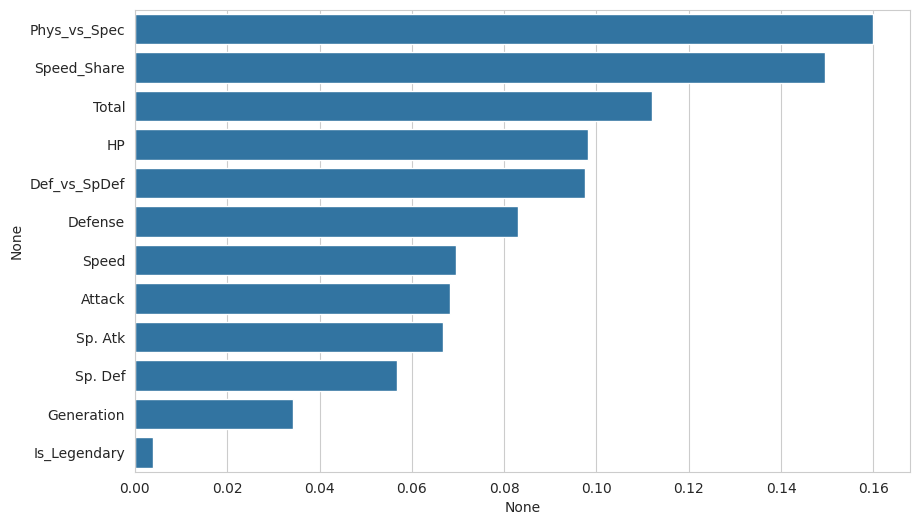

In [260]:
# Mostrar as colunas mais importantes agora
feature_imp = pd.Series(model.feature_importances_, index=features_enhanced).sort_values(ascending=False)
print("\nO que mais ajudou o modelo agora?")
print(feature_imp.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

**Resposta =** Teve um leve aumento, entretanto ainda está muito baixo,mas se pode ver que a junção de variaveis deu um resultado positivo.

###Tentativa 3:Juntando tudo e Utilizando o balanceamento

Balanceamento: seria como se desse pontos as chances, se acertar um resultado com probabilidade baixa de sair, ganha mais ponto do que acertar um resultado facil de sair.

1. Gradient Boosting: 26.55%
2. Random Forest Balanceado: 26.99%

O que importa no Modelo Final?
Phys_vs_Spec    0.106582
Speed_Share     0.099151
Attack          0.085708
Speed           0.084966
Def_vs_SpDef    0.083958
HP              0.083430
dtype: float64


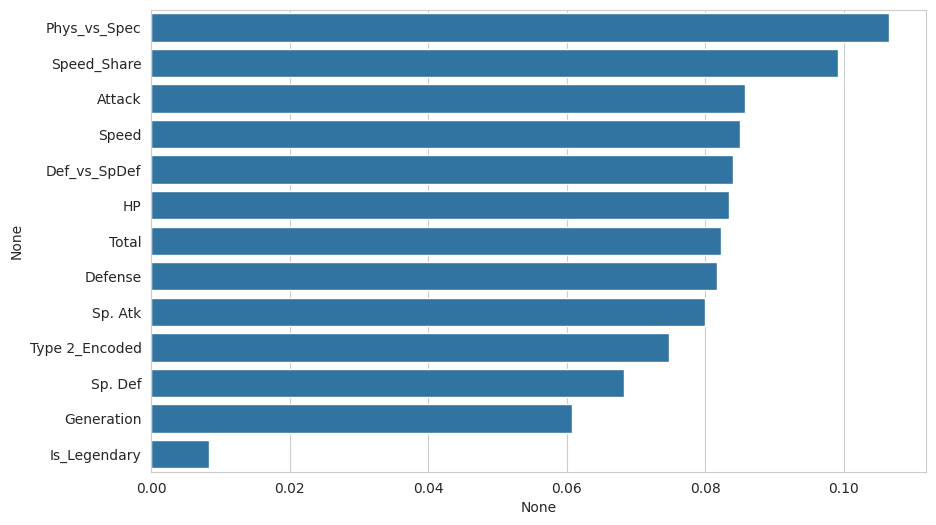

In [261]:
df_tudo = df.copy()

df_tudo['Is_Legendary'] = df_tudo['Legendary'].map(int)
df_tudo['Phys_vs_Spec'] = df_tudo['Attack'] - df_tudo['Sp. Atk']
df_tudo['Def_vs_SpDef'] = df_tudo['Defense'] - df_tudo['Sp. Def']
df_tudo['Speed_Share'] = df_tudo['Speed'] / df_tudo['Total']

# 3. Tratamento do Type 2
df_tudo['Type 2_Filled'] = df_tudo['Type 2'].fillna('None')
le = LabelEncoder()
df_tudo['Type 2_Encoded'] = le.fit_transform(df_tudo['Type 2_Filled'])

features_all = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total',
    'Generation', 'Is_Legendary',
    'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share',
    'Type 2_Encoded'
]

X = df_tudo[features_all]
y = df_tudo['Type 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
acc_gb = accuracy_score(y_test, gb_clf.predict(X_test))

# Random Forest com Balanceamento
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"1. Gradient Boosting: {acc_gb:.2%}")
print(f"2. Random Forest Balanceado: {acc_rf:.2%}")

# Ver importância das features no melhor modelo
best_model = gb_clf if acc_gb > acc_rf else rf_clf
feature_imp2 = pd.Series(best_model.feature_importances_, index=features_all).sort_values(ascending=False)
print("\nO que importa no Modelo Final?")
print(feature_imp2.head(6))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp2, y=feature_imp2.index)
plt.show()

Matriz de confusão Arvore

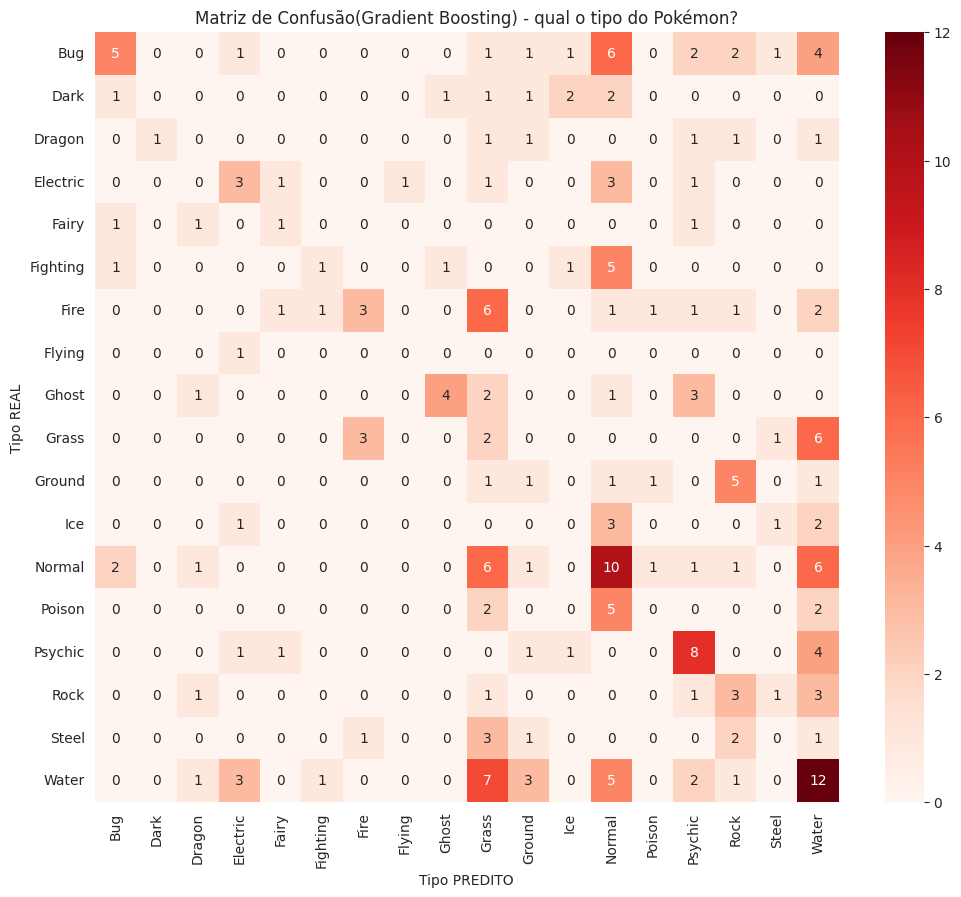

In [262]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=gb_clf.classes_, yticklabels=gb_clf.classes_)

plt.title('Matriz de Confusão(Gradient Boosting) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

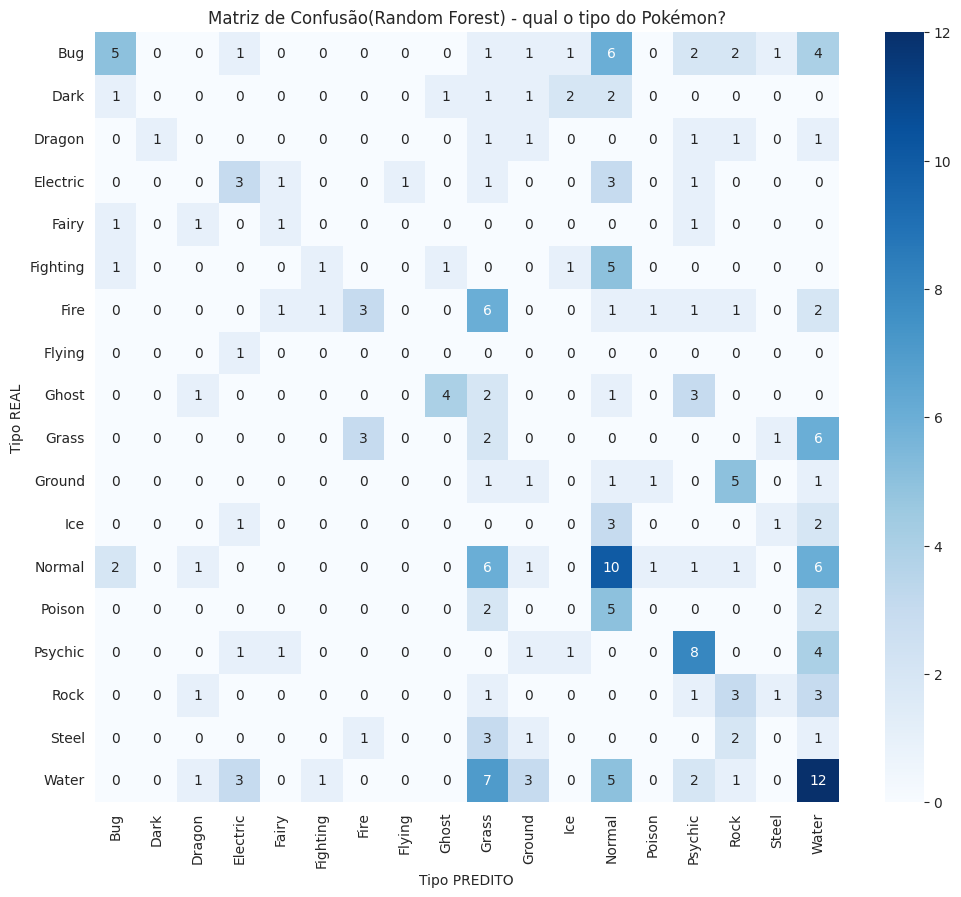

In [263]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)

plt.title('Matriz de Confusão(Random Forest) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

### testar com regressão logistica

In [265]:
df_reg = df.copy()

# Criando as variáveis extras que descobrimos serem úteis
df_reg['Phys_vs_Spec'] = df_reg['Attack'] - df_reg['Sp. Atk']
df_reg['Def_vs_SpDef'] = df_reg['Defense'] - df_reg['Sp. Def']
df_reg['Speed_Share'] = df_reg['Speed'] / df_reg['Total']
df_reg['Is_Legendary'] = df_reg['Legendary'].map(int)

# Codificando o Type 2 (Transformando texto em número)
df_reg['Type 2_Filled'] = df_reg['Type 2'].fillna('None')
le = LabelEncoder()
df_reg['Type 2_Encoded'] = le.fit_transform(df_reg['Type 2_Filled'])

# 2. Selecionar as Colunas
features = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total',
    'Generation', 'Is_Legendary',
    'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share',
    'Type 2_Encoded'
]

X = df_reg[features]
y = df_reg['Type 1'] # O que queremos prever

# 3. Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. PADRONIZAÇÃO (Passo Obrigatório para Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Criar e Treinar o Modelo
# 'multinomial': Pois temos mais de 2 tipos de pokemon
# 'max_iter=5000': Dá mais tempo para o modelo encontrar a matemática correta
log_reg = LogisticRegression(solver='lbfgs',
                             max_iter=5000,
                             class_weight='balanced',
                             random_state=42)

log_reg.fit(X_train_scaled, y_train)

# 6. Ver o Resultado
y_pred = log_reg.predict(X_test_scaled)
accuracy_reg = accuracy_score(y_test, y_pred)

print(f"Acurácia da Regressão Logística: {accuracy_reg:.2%}")

Acurácia da Regressão Logística: 18.14%


Matriz de confusão

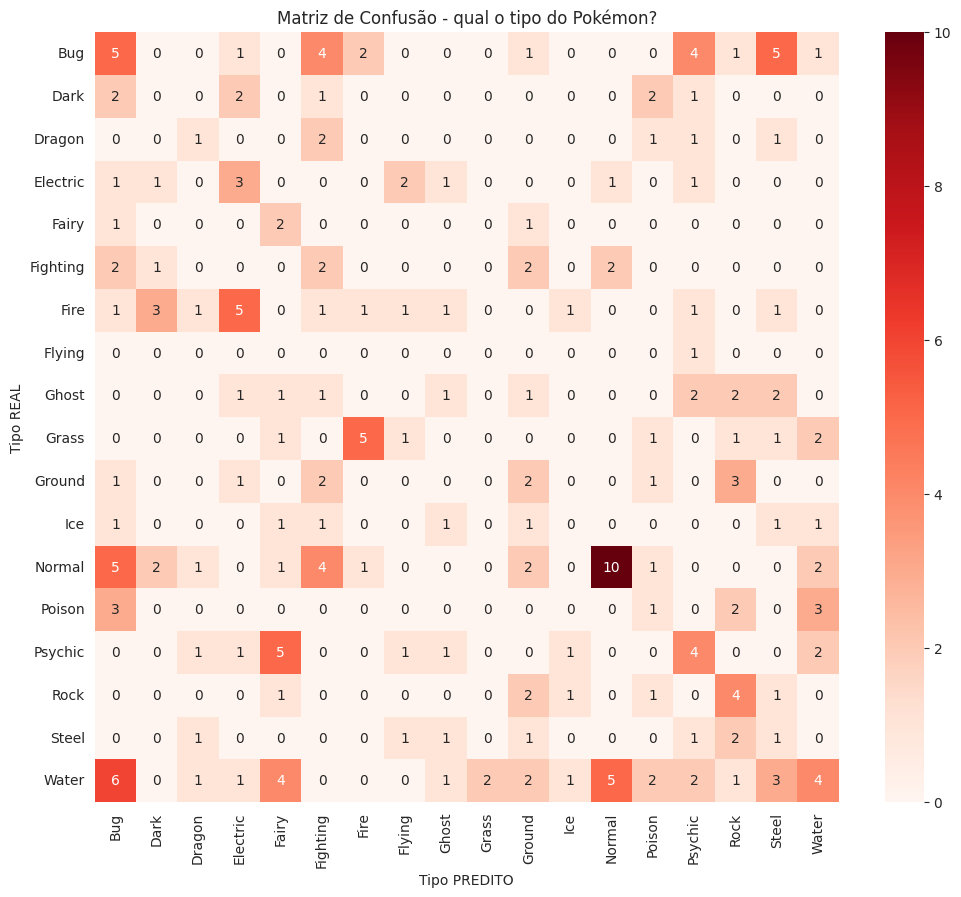

In [266]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)

plt.title('Matriz de Confusão - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

**Resultado =** Deu menos que a Random Forest (27%) porquê a regressão logística tenta traçar linhas retas para separar os tipos. porem não existe um padrão dos pokémon ,ou seja, não podem ser separados facilmente por linhas retas.O Modelo de Random Forest conseguem criar regras, não necessariamentte retilineo, que funcionam melhor no ambiente atual.

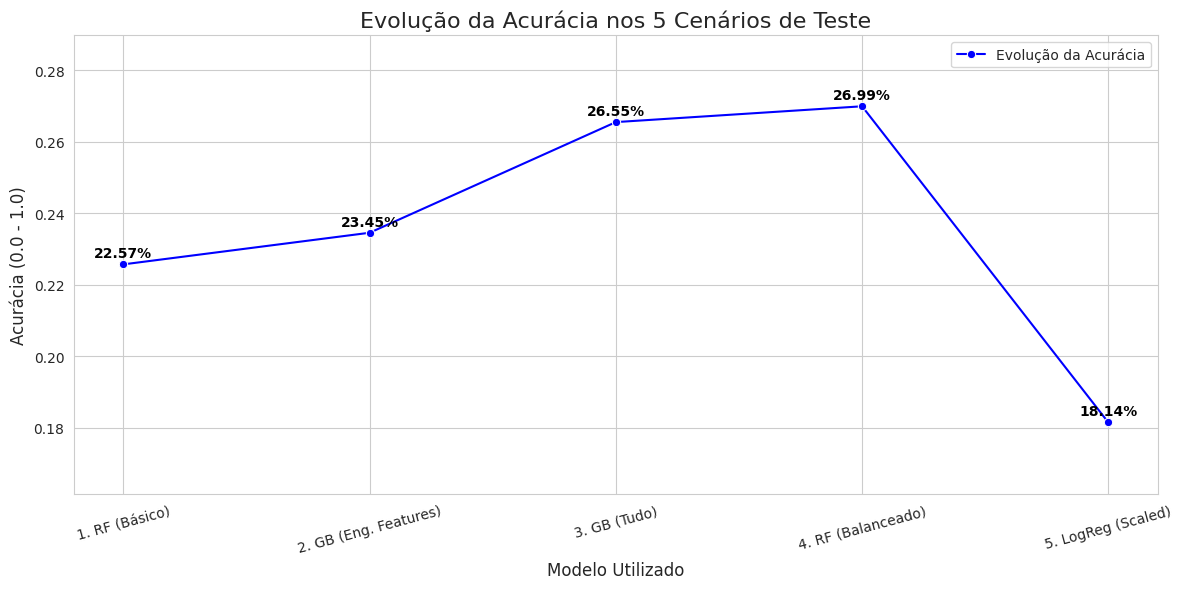

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#nome dos metodos
metodos = [
    '1. RF (Básico)',
    '2. GB (Eng. Features)',
    '3. GB (Tudo)',
    '4. RF (Balanceado)',
    '5. LogReg (Scaled)'
]
valores_acuracia = [accuracy_rf, accuracy_gb, acc_gb, acc_rf, accuracy_reg]
# Criando um DataFrame para facilitar o plot com Seaborn
df_resultados = pd.DataFrame({
    'Método': metodos,
    'Acurácia': valores_acuracia
})


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar o gráfico de linha para mostrar a "Evolução"
ax=sns.lineplot(data=df_resultados, x='Método', y='Acurácia', marker='o', sort=False, color='b', label='Evolução da Acurácia')


# Adicionar o valor da porcentagem em cima de cada ponto
for index, row in df_resultados.iterrows():
    ax.text(index, row['Acurácia'] + 0.002, f"{row['Acurácia']:.2%}", color='black', ha="center", fontweight='bold')

plt.title('Evolução da Acurácia nos 5 Cenários de Teste', fontsize=16)
plt.ylabel('Acurácia (0.0 - 1.0)', fontsize=12)
plt.xlabel('Modelo Utilizado', fontsize=12)
plt.ylim(min(valores_acuracia) - 0.02, max(valores_acuracia) + 0.02) # Ajustar zoom do eixo Y
plt.xticks(rotation=15) # Rotacionar nomes para não sobrepor

plt.tight_layout()
plt.show()

## Conclusão

Não é possivel classificar o tipo do pokemon levando em consideração as estatisticas dele, uma vez que existem muitos pokemon e diversidade em relação a status, o que se da para fazer é chegar em uma especie de racicionio de predição onde a chance de acertar chega mais perto se considerar a estatistica mais alta, exemplo se so SP. Attack foi a estatistica mais alta a chance de ser um pokémon do tipo psiquico ou eletrico é maior do que ser um pokemon lutador ou pedra, mas não se tem um valor alto da certeza desse "palpite".

## Hipotese 2

É possivel descobri se o Pokémon é lendario se analizando a soma de status e o seu número na pokedex?

### Dados relevantes para a Hipotese

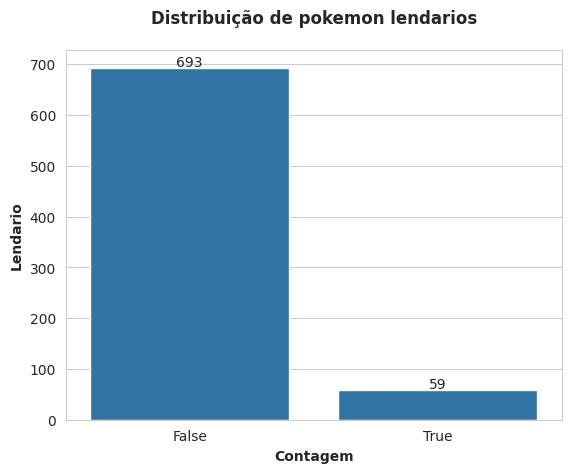

In [268]:
ax =sns.countplot(data = df,x ="Legendary")

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2.5,
        int(height),
        ha='center'
    )


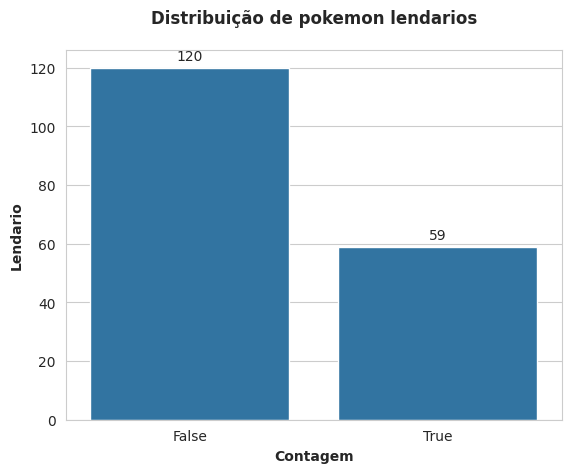

In [269]:
Contagem = df[(df['Total'] > 500)]
ax =sns.countplot(data = Contagem,x ="Legendary")
ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2.5,
        int(height),
        ha='center'
    )

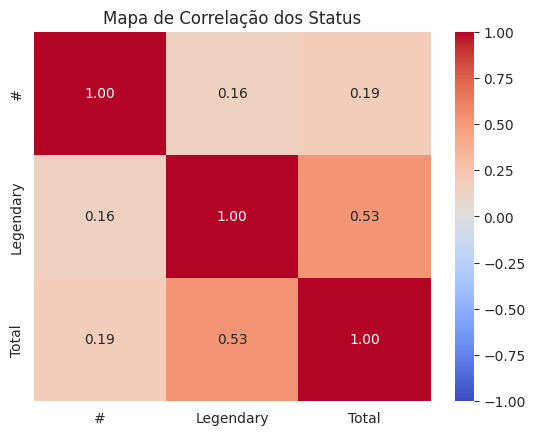

In [270]:
corr_leg = df[["#","Legendary","Total"]].corr()
sns.heatmap(corr_leg, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')
plt.savefig('correlation_heatmap.png')

Text(0, 0.5, 'Total Stats')

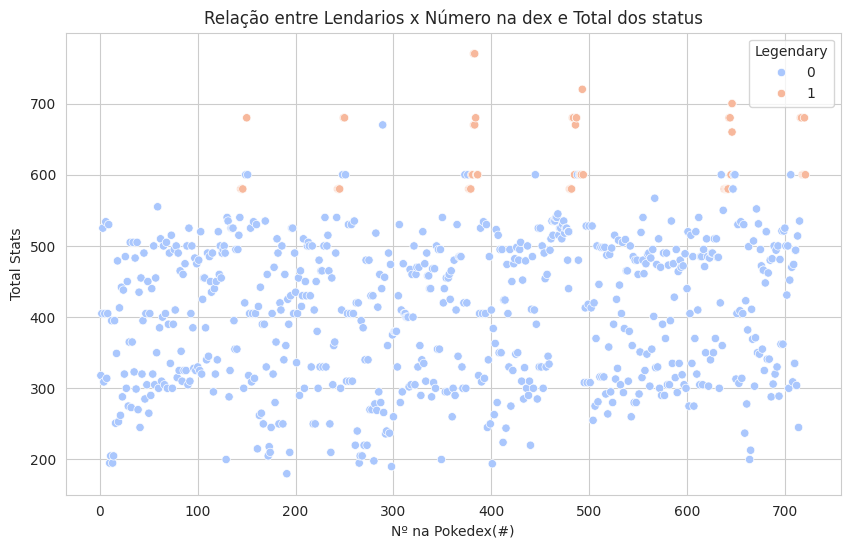

In [271]:
df_leg = df.copy()

df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total']]
y = df_leg['Legendary']

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_leg, x='#', y='Total', hue='Legendary', palette='coolwarm')
plt.title('Relação entre Lendarios x Número na dex e Total dos status')
plt.xlabel('Nº na Pokedex(#)')
plt.ylabel('Total Stats')

### Tentativa 1: ERegressçao Logistica

In [279]:
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_rel1 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel1: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  95.36% 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       140
           1       0.67      0.73      0.70        11

    accuracy                           0.95       151
   macro avg       0.82      0.85      0.84       151
weighted avg       0.96      0.95      0.95       151



Text(0.5, 1.0, 'Matriz de Confusão: Classificação de Pokémons Lendários')

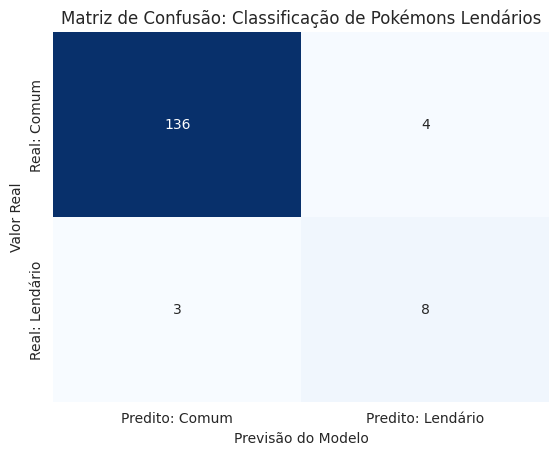

In [273]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predito: Comum', 'Predito: Lendário'],
            yticklabels=['Real: Comum', 'Real: Lendário'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: Classificação de Pokémons Lendários')

In [274]:
X = df[['#', 'Total']]

y = df['Legendary'].astype(int)

X_sm = sm.add_constant(X) # Adiciona a constante (necessário para regressão)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.066420
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  752
Model:                          Logit   Df Residuals:                      749
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Dec 2025   Pseudo R-squ.:                  0.7585
Time:                        05:17:33   Log-Likelihood:                -49.948
converged:                       True   LL-Null:                       -206.79
Covariance Type:            nonrobust   LLR p-value:                 7.669e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0043      4.936     -7.294      0.000     -45.679     -26.330
#              0.0007      0

## Melhorando o código

foi adicionado a varivavel geração a predição, para ver se consegue melhora, uma vez que ela tem uma relação mediana para alta com as outra variaveis utilizadas, como sera ostrado a seguir

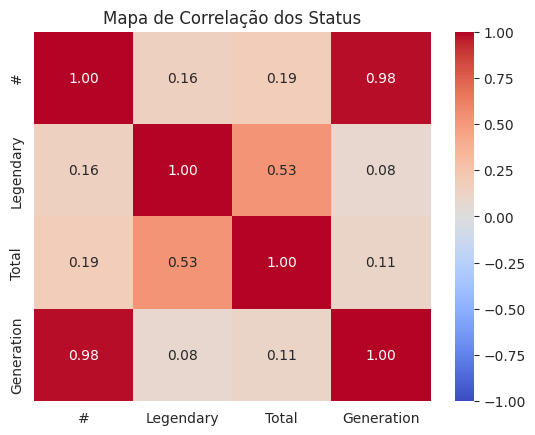

In [275]:
corr_leg = df[["#","Legendary","Total","Generation"]].corr()
sns.heatmap(corr_leg, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')
plt.savefig('correlation_heatmap.png')

In [280]:
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total','Generation']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_rel2 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel2: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  95.36% 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       140
           1       0.67      0.73      0.70        11

    accuracy                           0.95       151
   macro avg       0.82      0.85      0.84       151
weighted avg       0.96      0.95      0.95       151



In [277]:
X = df[['#', 'Total', 'Generation']]
y = df['Legendary'].astype(int)

X_sm = sm.add_constant(X)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.063210
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  752
Model:                          Logit   Df Residuals:                      748
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Dec 2025   Pseudo R-squ.:                  0.7701
Time:                        05:18:25   Log-Likelihood:                -47.534
converged:                       True   LL-Null:                       -206.79
Covariance Type:            nonrobust   LLR p-value:                 9.802e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.5217      5.124     -6.152      0.000     -41.564     -21.479
#              0.0205      0

Matriz  de confusão

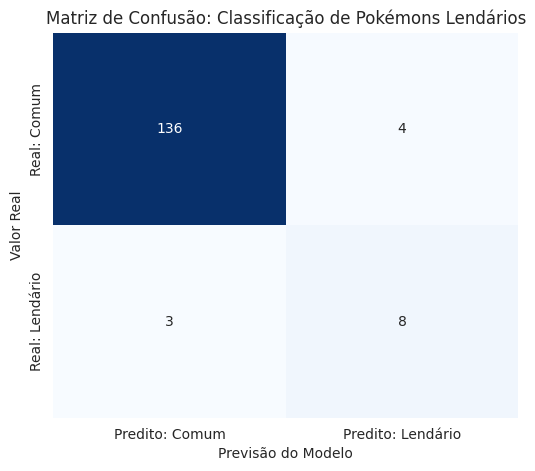

In [281]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predito: Comum', 'Predito: Lendário'],
            yticklabels=['Real: Comum', 'Real: Lendário'])

plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: Classificação de Pokémons Lendários')

plt.show()

# 2º tentativa de melhoria:Utilizando os status e não o total

Text(0.5, 1.0, 'Correlação entre Status e Ser Lendário')

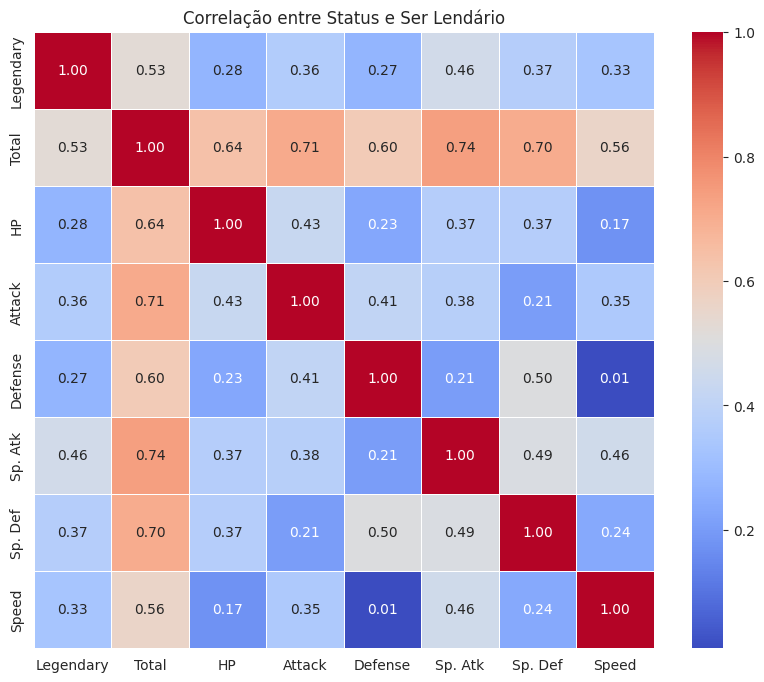

In [291]:
df_leg = df.copy()
df_leg['Legendary'] = df_leg['Legendary'].map(int)

features = ['Legendary','Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
correlation_matrix = df_leg[features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Status e Ser Lendário')

In [293]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

X = df_leg[features]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) # Aumentei o max_iter para garantir convergência
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_stat = accuracy_score(y_test, y_pred)
print(f"Accuracy com Status Individuais: {accuracy_stat:.2%} ")

Accuracy com Status Individuais: 96.69% 


**Resultado** = Usando os status teve um leve aumento, pois quando se usa a soma dos status não se enxerga as corelações entre um stat maior e outro menor, como por exemplo um lendario tem a correlção grande em ter um alto sp.attack em contrapartida terá uma baixa defessa física ou tender a ser mais veloz do que ter mais HP, esses detalhes ajudaram ao modelo a subir 1%.

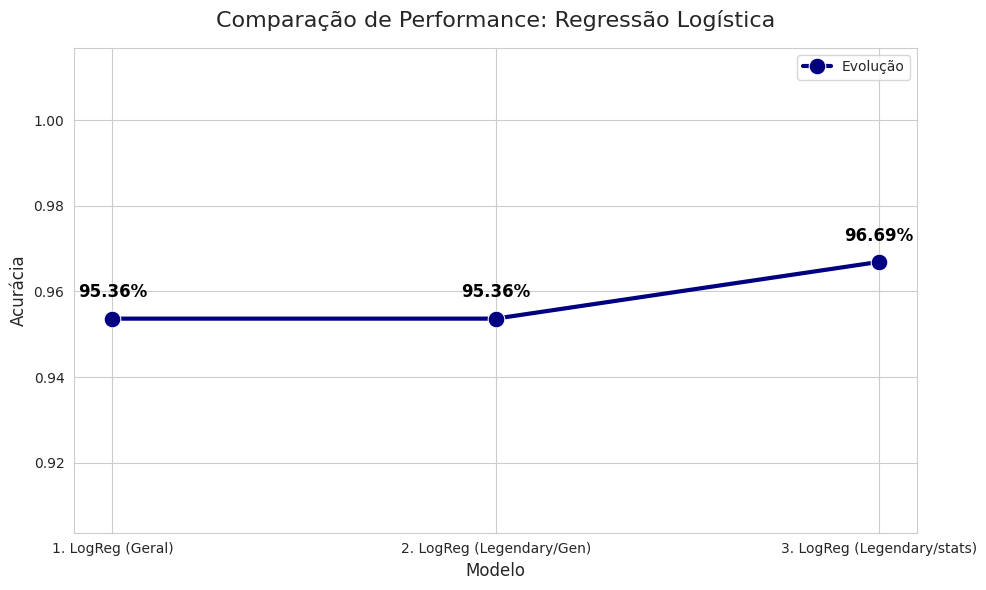

In [296]:
cenarios = [
    '1. LogReg (Geral)',
    '2. LogReg (Legendary/Gen)',
    '3. LogReg (Legendary/stats)'
]

valores_acuracia = [
    accuracy_rel1,
    accuracy_rel2,
    accuracy_stat
]

df_compare = pd.DataFrame({
    'Cenário': cenarios,
    'Acurácia': valores_acuracia
})


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de Linha (Para mostrar a evolução/diferença)
ax=sns.lineplot(data=df_compare, x='Cenário', y='Acurácia',
             marker='o', markersize=12, color='navy', linewidth=3, label='Evolução')


# Adicionar a porcentagem em cima de cada barra/ponto
for index, row in df_compare.iterrows():
    ax.text(
        x=index,
        y=row['Acurácia'] + 0.005,
        s=f"{row['Acurácia']:.2%}",
        color='black',
        ha="center",
        fontweight='bold',
        fontsize=12
    )

# Títulos e Rótulos
plt.title('Comparação de Performance: Regressão Logística', fontsize=16, pad=15)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Modelo', fontsize=12)

# Ajuste automático do zoom do eixo Y para destacar a diferença
min_val = min(valores_acuracia)
max_val = max(valores_acuracia)
plt.ylim(min_val - 0.05, max_val + 0.05)

plt.legend()
plt.tight_layout()
plt.show()

###  Conclusão

Sim, da para caracterizar se o pokemon é lendario atráves do seu total de status e numero na dex entretanto adiocionar a variavel geração  é algo irrelevante visto que não teve aumento, já que ele não tem um grao de relação com os outros tão grande. Em resumo está sim provado que existe um padrão quase fixo de como um lendario se caracteriza


#Conclusão do trabalho

Com essas verificações foi possivel que não, não é possivel predizer a tipagem de pokemon unicamente com seus status, pois os desenvolvedores não leva, em consideração unicamente seus staus, mas normalmente a levam em consideração a sua inspiração de origem, cor, e habientação e com tudo isso indica o seu tipo e ai sim vem a "padronização" dos staus, portanto é mais facil dizer o contrario, se souber o tipo do pokemon você tende a saber qual é o status mais forte dele.<br>
Em relaçao a outra hipotese, sim é possivel dizer se o pokémeon é lendario se levar em condição a soma de seus status,não somente a soma deles algo que é alto é por ser uma das cacteristicas que os lendarios tem, pois com status consegue enxergar algins padrões pequenos relações que não eram possiveis com a soma total,além de com a ajuda de número da pokedex, já que a pokedez é listada de acordo com a ordem de quando o jogador pode encontrar aquele pokemon e os lendarios normalmente são os ultimos a serem vistos, também deixa muito mais fácil a a classificação do pokemons sendo lendaroi ou não.